Matplotlib Backend: module://ipykernel.pylab.backend_inline
-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pandas              1.1.4
parso               0.5.1
pexpect             4.7.0
pickleshare         0

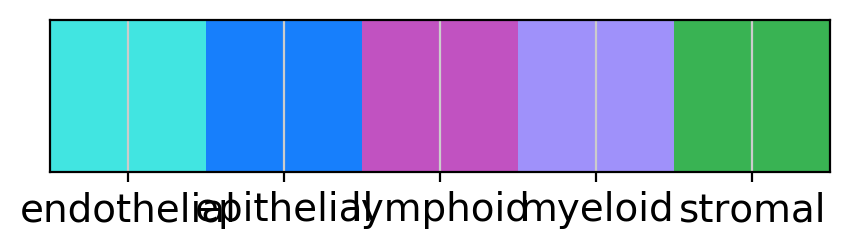

In [1]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict

import glob
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
import yaml


# sys.path.append('/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/')

# Handwritten modules
import preprocess

from plot_utils import save_figures

In [2]:
# ! cp /home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/preprocess.py .

## Constants

In [3]:
tissue = 'blood'

umap_plot_kws = dict(color=['species', 'compartment_group', 'broad_group'], ncols=2)
celltype_col = 'narrow_group'
species_col = 'species'
compartment_col = 'compartment_group'

object_dir = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species'

output_file = os.path.join(object_dir, f'concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad')

min_cells_per_celltype = 15

## Set scanpy savefig options

In [4]:

xspecies_figure_folder = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle'

figure_folder = os.path.join(xspecies_figure_folder, tissue, 'preprocess')

sc._settings.ScanpyConfig(autosave=True, figdir=figure_folder, autoshow=True)
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "Arial"

sc.settings.autosave = True
sc.settings.autoshow = True
sc.settings.figdir = figure_folder

# Load data

## Unprocessed data

In [5]:
h5ad = os.path.join(object_dir, f'concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__july2021.h5ad')


adata = sc.read(h5ad, cache=True)

# Remove sapiens
adata = adata[adata.obs.species_batch != 'human_sapiens']
adata

View of AnnData object with n_obs × n_vars = 42529 × 13302
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch', 'channel_10x', 'compartment', 'tissue__cell_ontology_class', 'tissue__free_annotation', 'method', 'species_batch'
    var: 'mouse_lemur__gene_name', 'mouse__gene_name', 'name-lemur', 'highly_variable-lemur', 'n_cells-mouse_tabula_muris_senis'

In [6]:
for key in adata.uns.keys():
    if key.endswith('colors'):
        del adata.uns[key]

In [7]:
preprocess.plot_constants.SPECIES_PALETTE

['#ff7f0e', '#2ca02c', '#1f77b4']

In [8]:
adata.obs.groupby(['narrow_group', 'species']).size().unstack()

species,Human,Mouse,Mouse Lemur
narrow_group,,,
B cell,455,1876,747
CD4+ T cell,0,578,0
CD8+ T cell,0,477,0
CXCR6+ T cell,0,19,0
IGSF21+ dendritic cell,2,0,0
T cell (CD4+),1205,0,1863
T cell (CD8+),1016,0,172
TMEM176+ T cell,0,9,0
basophil,1,66,2


In [9]:
adata.uns['species_colors'] = preprocess.plot_constants.SPECIES_PALETTE

Trying to set attribute `.uns` of view, copying.


... storing 'compartment_broad' as categorical
... storing 'compartment_narrow' as categorical
... storing 'compartment_broad_narrow' as categorical
... storing 'compartment_species' as categorical
... storing 'compartment_narrow_species' as categorical
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


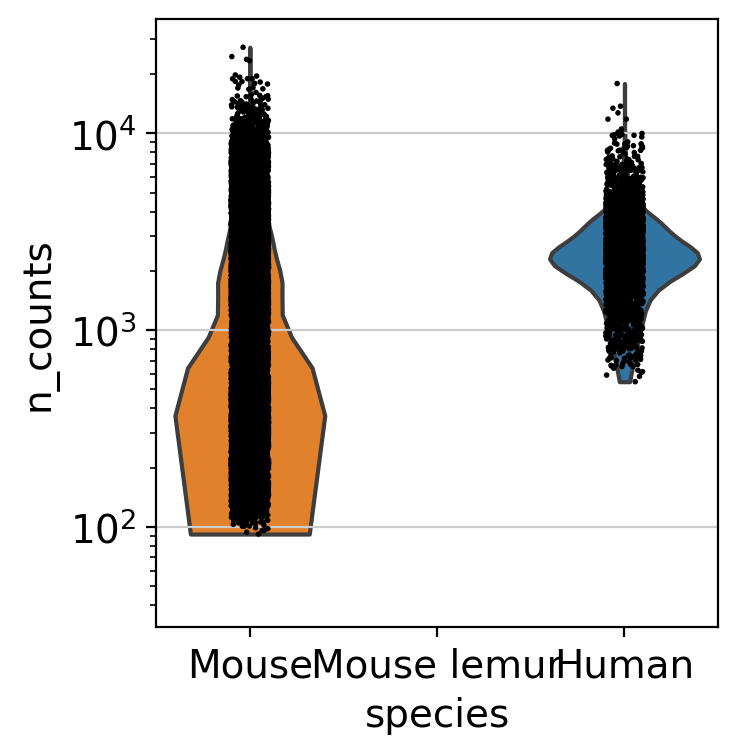

<Figure size 800x800 with 0 Axes>

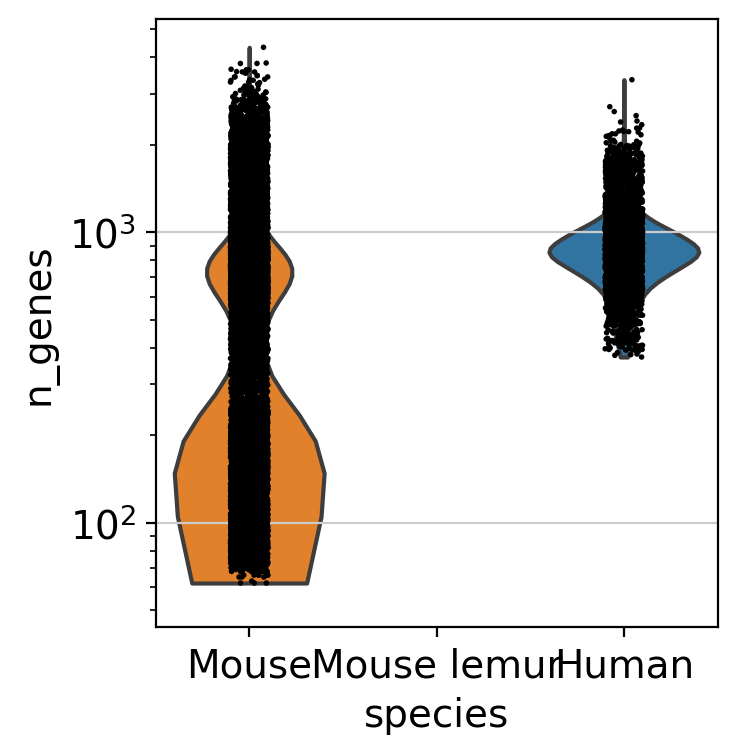

<Figure size 800x800 with 0 Axes>

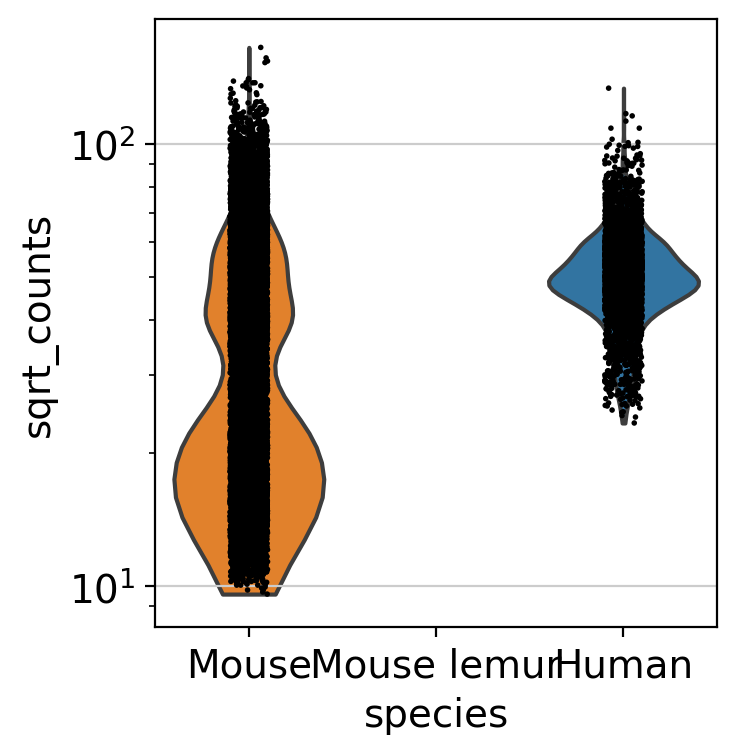

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 800x800 with 0 Axes>

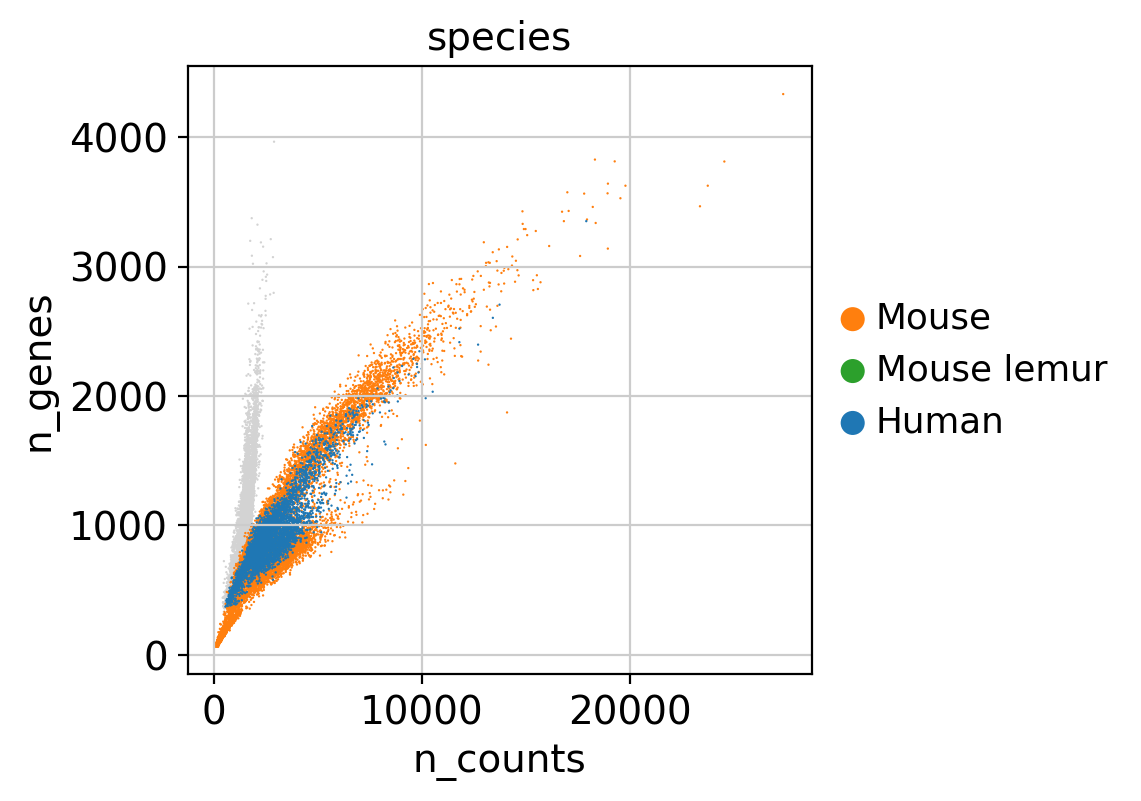

<Figure size 800x800 with 0 Axes>

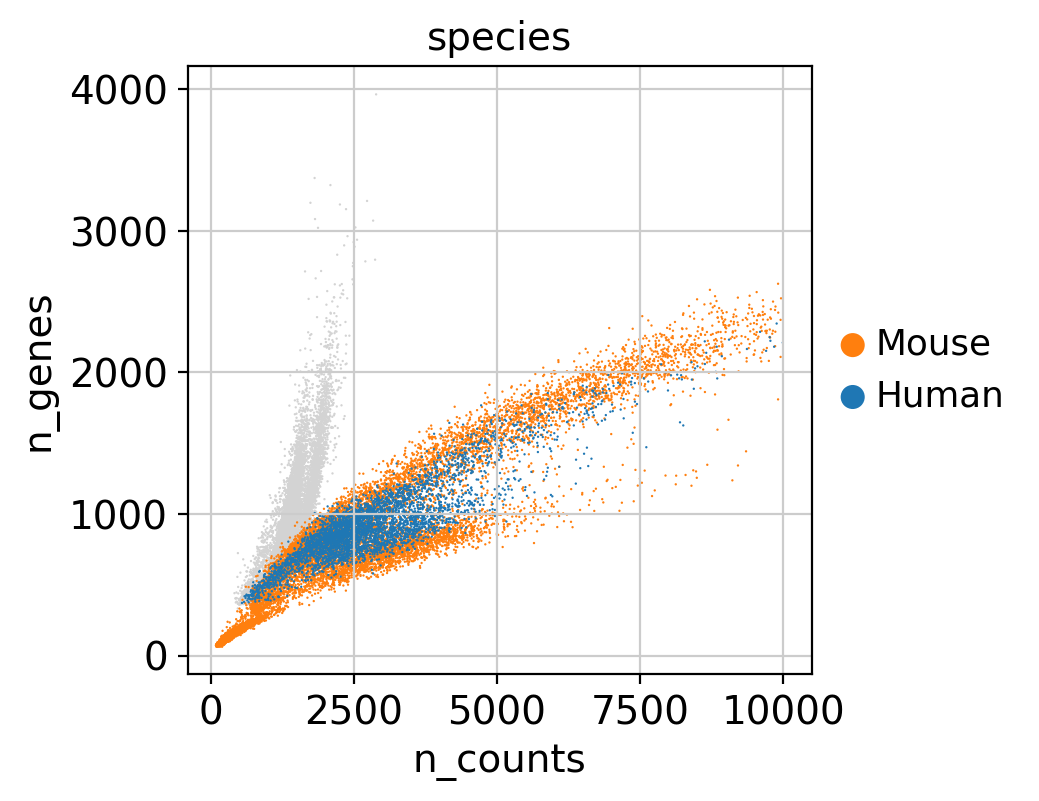

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 800x800 with 0 Axes>

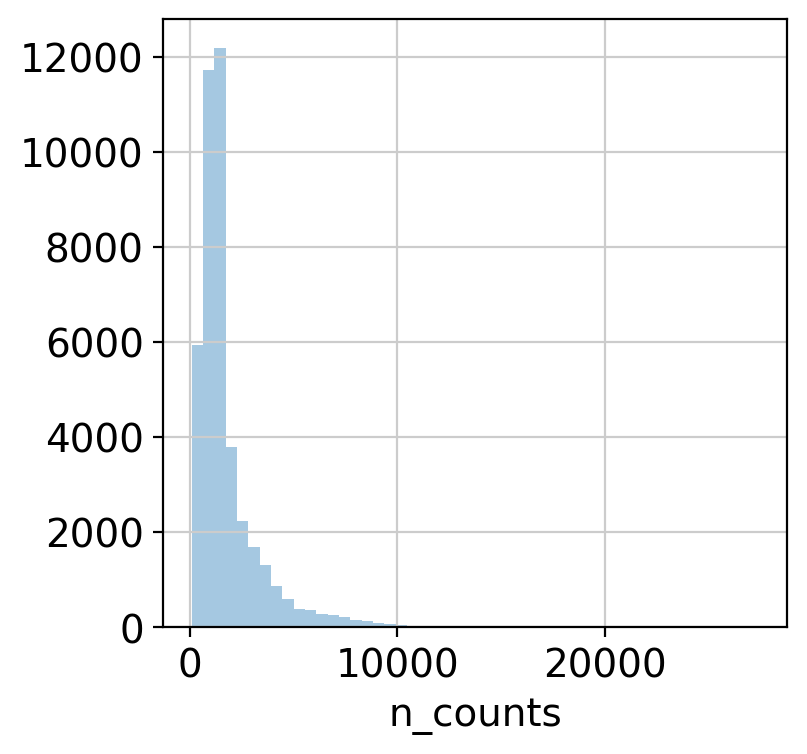

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


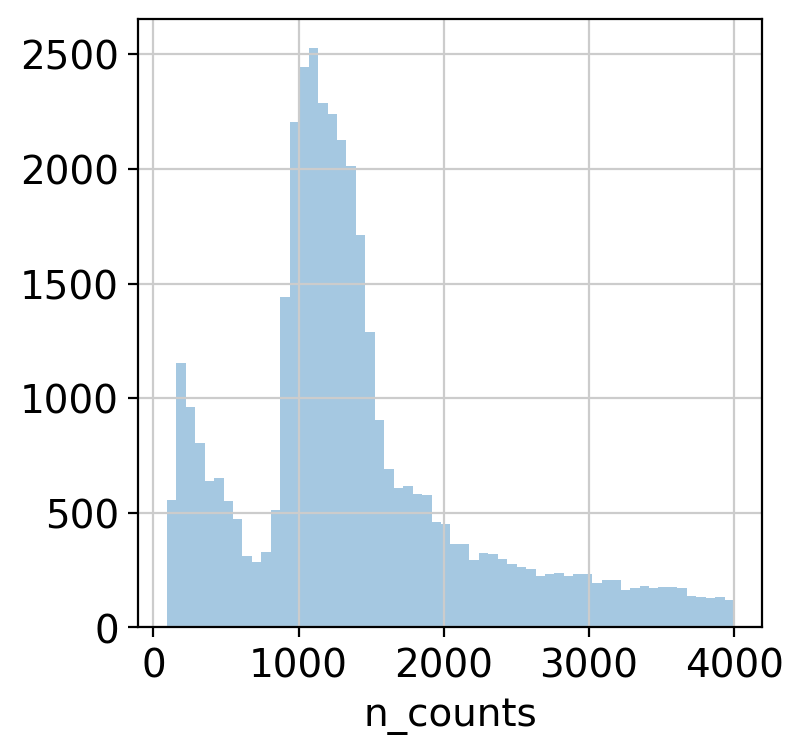

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


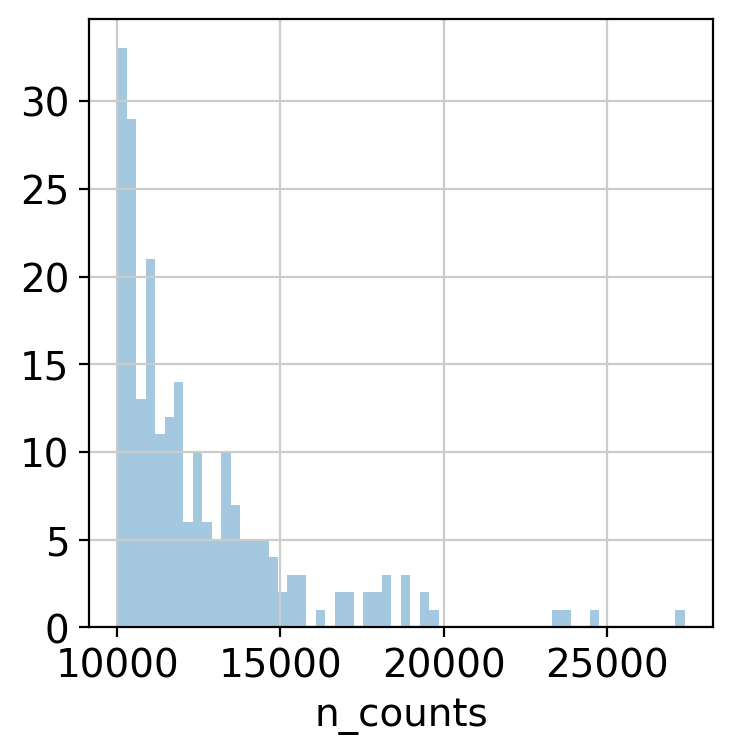

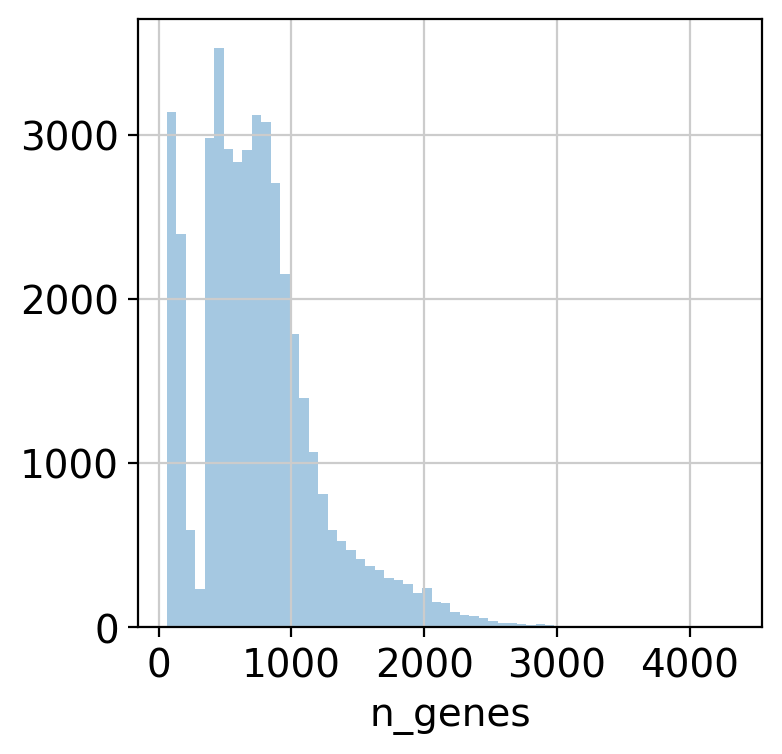

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


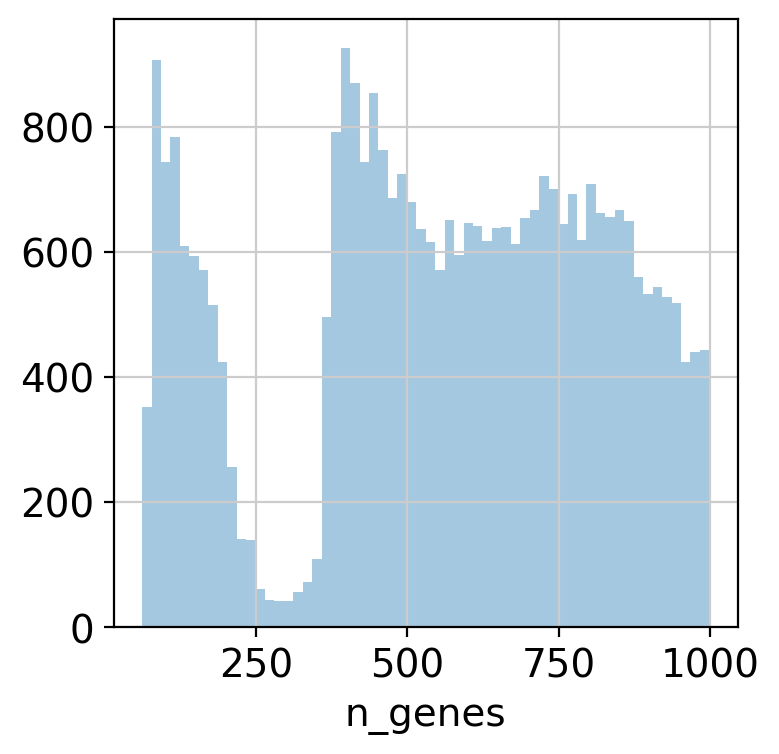

filtered out 10727 cells that have less than 1000 counts


Total number of cells: 42529
Number of cells after min count filter: 31802
Number of cells after gene filter: 31802
Total number of genes: 13302


filtered out 1113 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)


Number of genes after cell filter: 12189


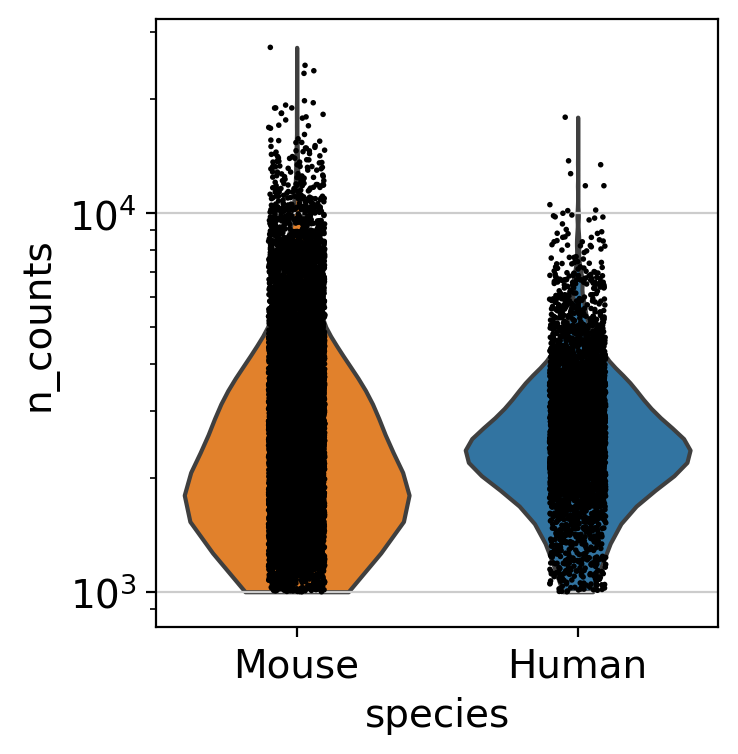

<Figure size 800x800 with 0 Axes>

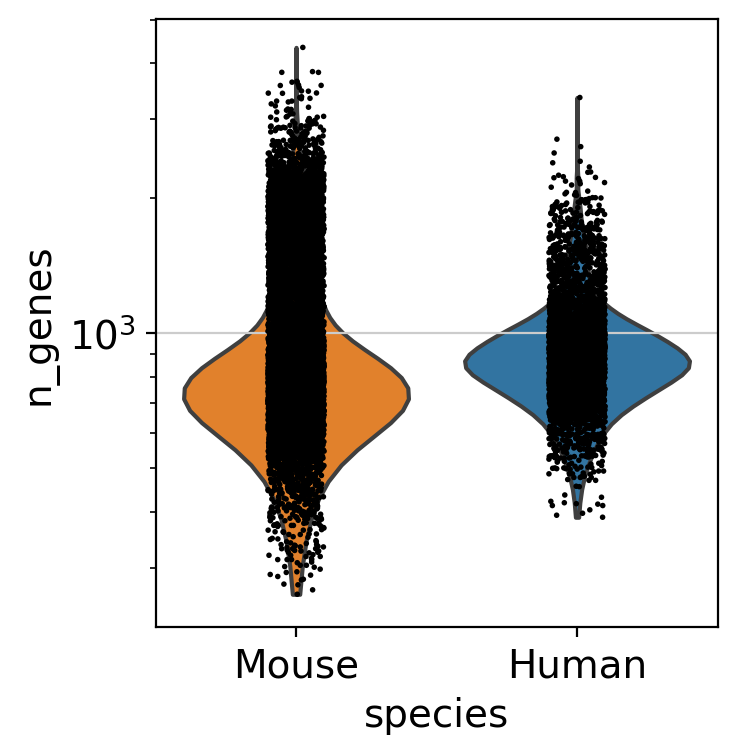

<Figure size 800x800 with 0 Axes>

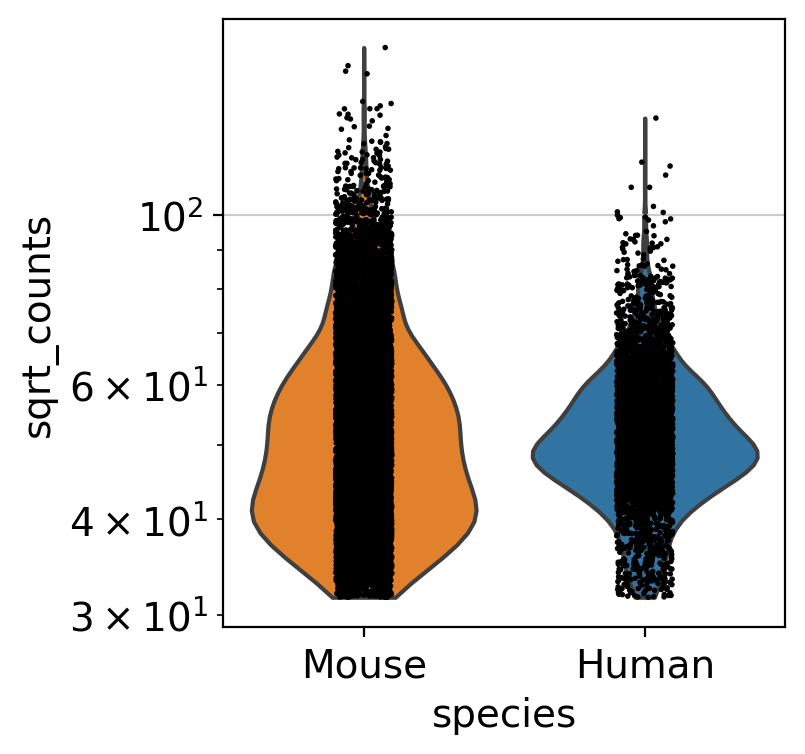

<Figure size 800x800 with 0 Axes>

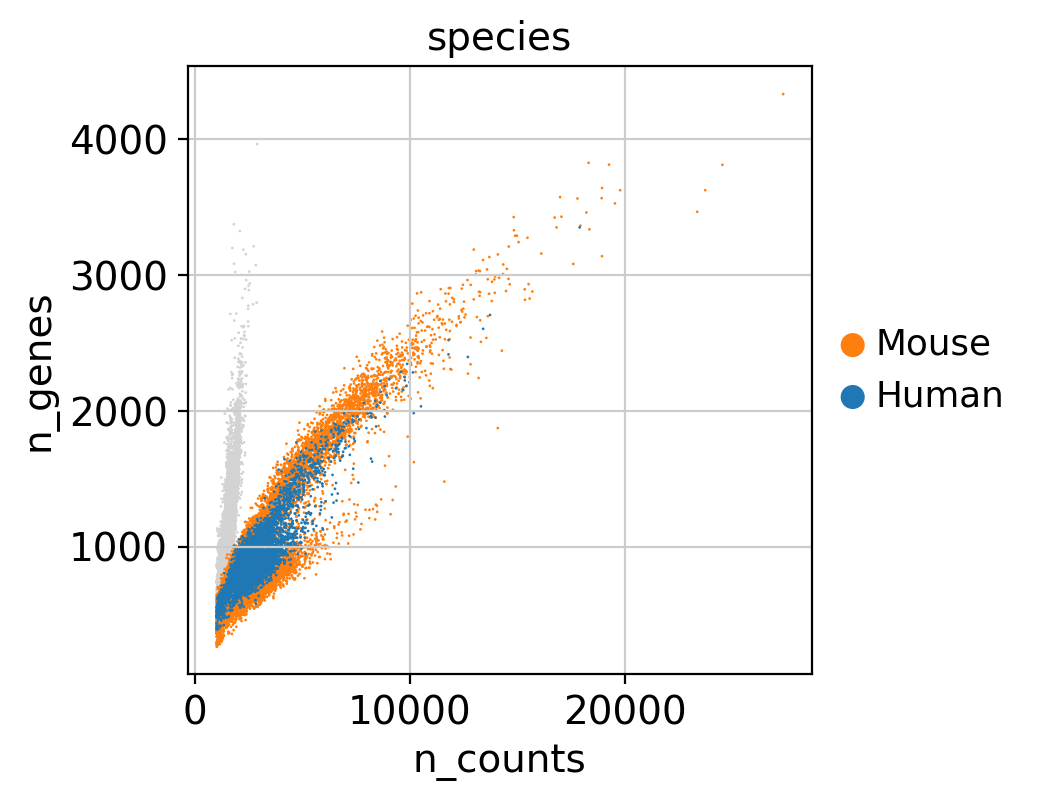

<Figure size 800x800 with 0 Axes>

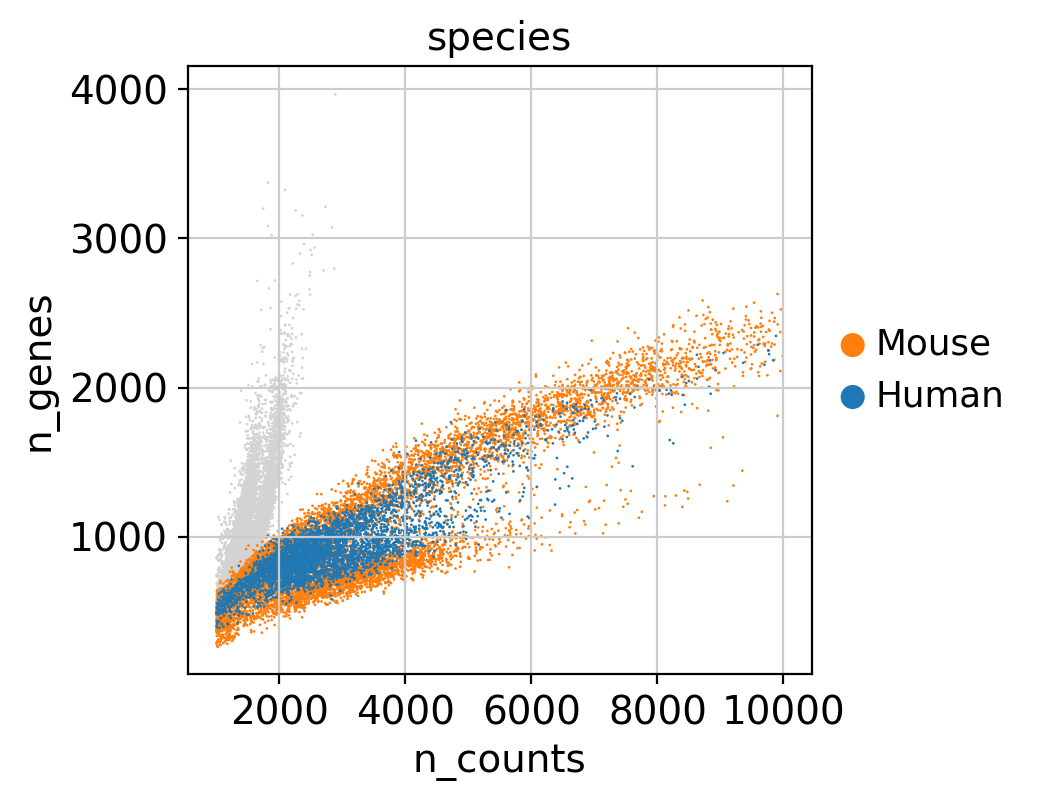

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 800x800 with 0 Axes>

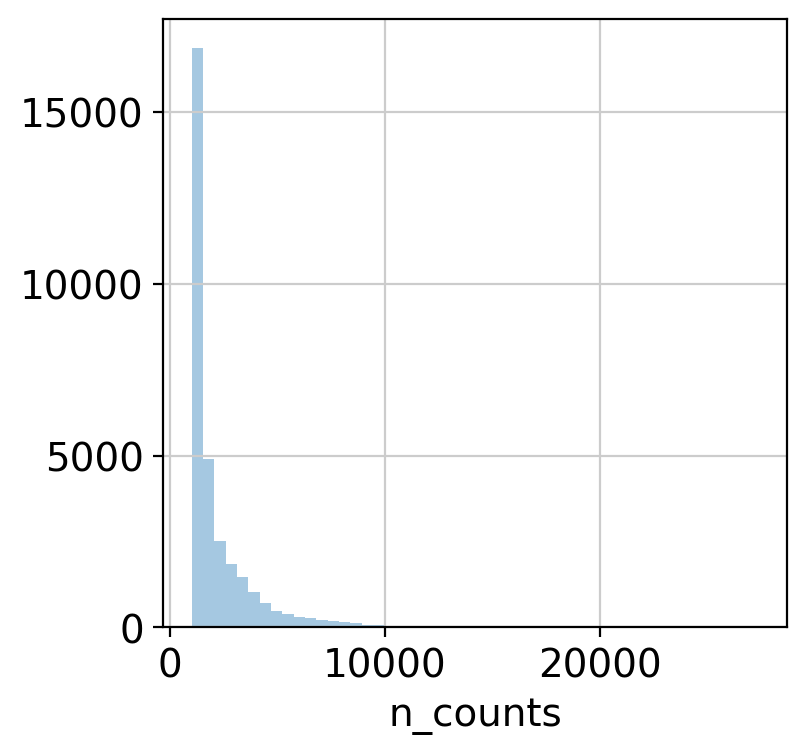

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


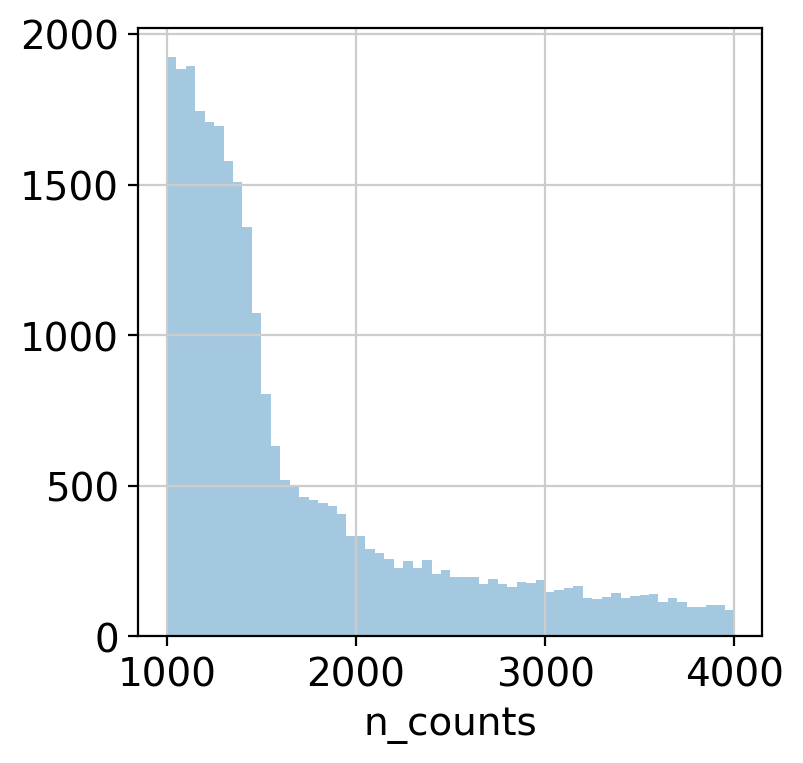

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


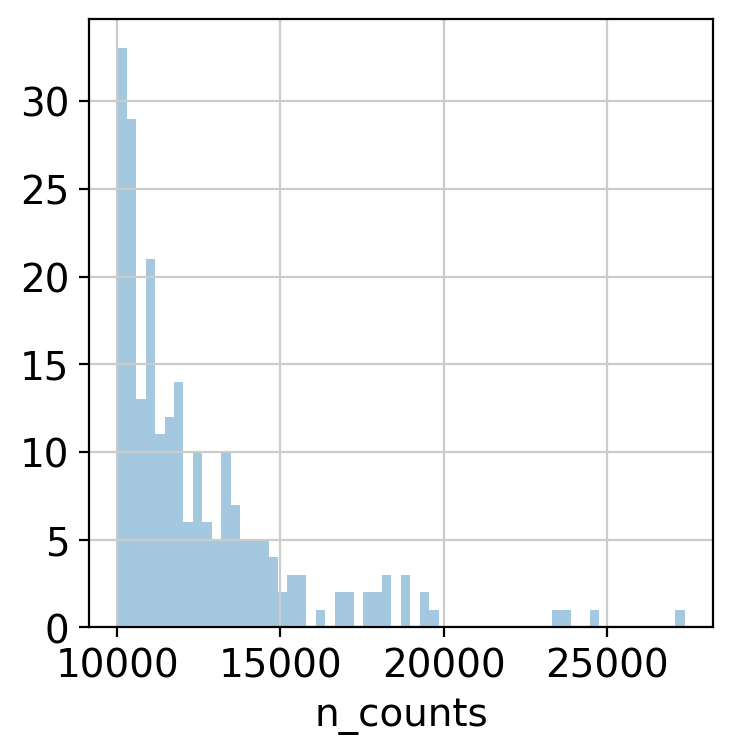

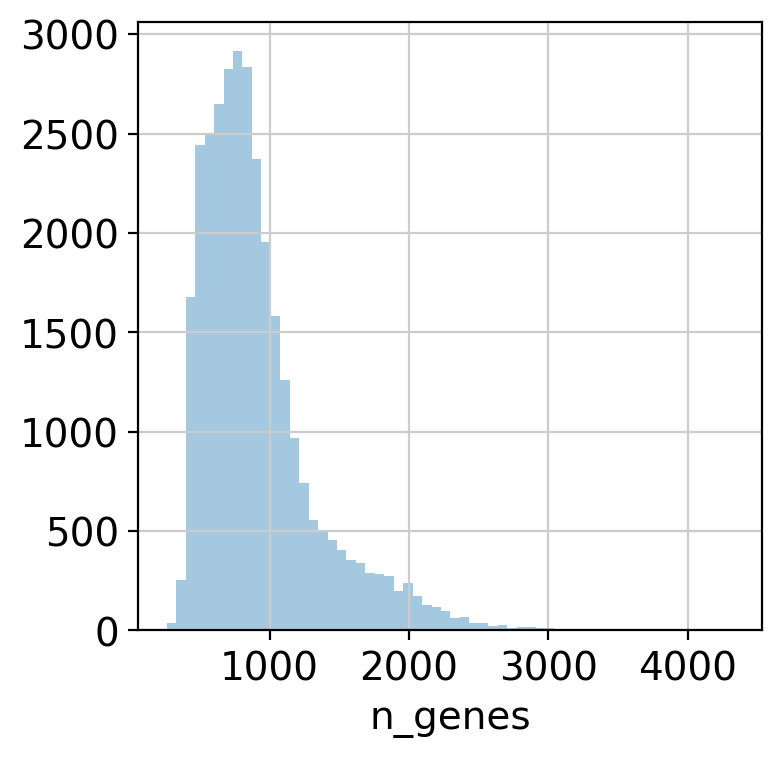

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


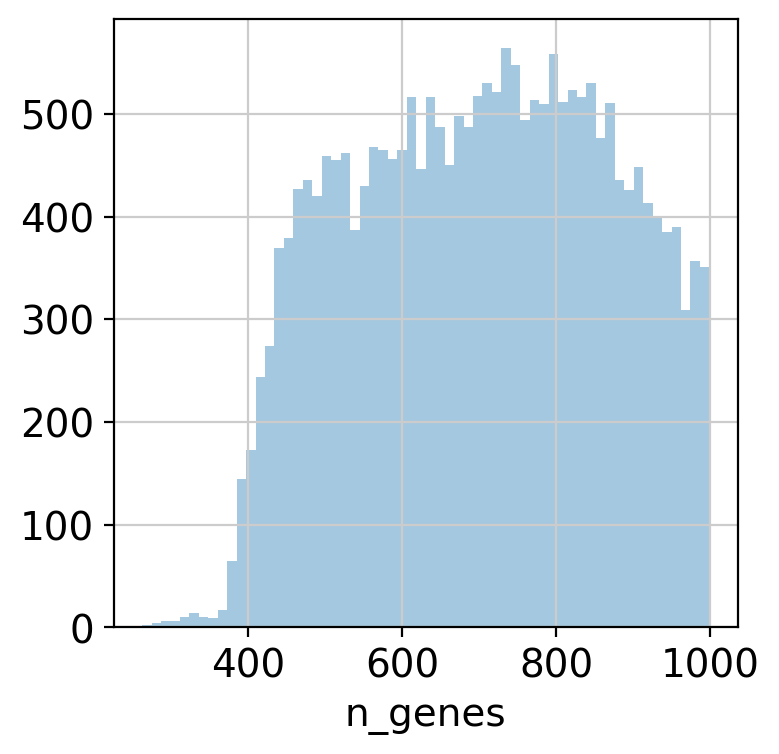

In [10]:
adata = preprocess.add_compartment_combined_cols(adata)
adata = preprocess.filter_genes_cells(adata)


# Plot shared cell types

In [11]:
adata.uns['species_colors'] = preprocess.plot_constants.SPECIES_PALETTE

In [12]:
min_cells_per_celltype

15

In [13]:


adata = preprocess.filter_min_cells_per_group(
    adata,
    celltype_col=celltype_col,
    species_col=species_col,
    min_cells_per_celltype=min_cells_per_celltype,
)


Filtering for celltype column narrow_group with at least 15 cells per species
--- Before filtering ---
-- Number of cell types: 32 --
narrow_group                              species
B cell                                    Mouse      1834
                                          Human       441
CD4+ T cell                               Mouse       570
                                          Human         0
CD8+ T cell                               Mouse       467
                                          Human         0
CXCR6+ T cell                             Mouse        19
                                          Human         0
IGSF21+ dendritic cell                    Mouse         0
                                          Human         2
T cell (CD4+)                             Mouse         0
                                          Human      1191
T cell (CD8+)                             Mouse         0
                                          Human       996
TMEM

## Plot shared cell tyeps

In [14]:
preprocess.plot_shared_cell_types(adata, celltype_col, compartment_col, species_col)
save_figures(os.path.join(figure_folder, 'shared_cell_types'))

Saving figures: 0it [00:00, ?it/s]

(0, 4)


# Dimensionality reduction

## Do PCA + k-nearest neighbors pre-batch correction with BBKNN

In [15]:
adata = preprocess.dimensionality_reduction(adata)

extracting highly variable genes


ZeroDivisionError: division by zero

## Pre-BBKNN UMAPs

In [ ]:
preprocess.remove_color_palettes(adata)

In [ ]:
adata.obs['age'] = adata.obs['age'].astype(str)

In [ ]:
# preprocess.plot_umaps(adata)

## Do BBKNN, draw new umaps

In [ ]:
preprocess.run_bbknn(adata)

### Post-BBKNN UMAPs

In [ ]:
# preprocess.plot_umaps(adata)

In [ ]:
preprocess.remove_color_palettes(adata)

### Species

In [ ]:
try:
    del adata.uns['species_colors']
except KeyError:
    pass
tab10 = sns.color_palette('tab10')
sc.pl.umap(adata, color='species', palette=tab10[:3], save='__species')

### Compartment group

In [ ]:
# there is some bug when the palette is pre-set
try:
    del adata.uns['compartment_group_colors']
except KeyError:
    pass

sc.pl.umap(adata, color='compartment_group', save='__compartment_group', palette='Set2')

### Narrow group

In [ ]:
preprocess.remove_color_palettes(adata)
sc.pl.umap(adata, color='narrow_group', palette='tab20', save='__narrow_group')

## Save all figures

In [ ]:
# import sys
# # sys.path.append()

# sys.path.append('/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies')

from plot_utils import save_figures

In [ ]:
save_figures(figure_folder)

## Write output adata to file

In [ ]:
# # Write BBKNN + UMAP data to file
adata.write(output_file)

In [ ]:
output_file

In [ ]:
! ls -lha $output_file

## Write narrow group names for correlations

In [ ]:
' '.join([x.replace(' ',  '\\') for x in sorted(set(adata.obs['narrow_group']))])

In [ ]:
adata.obs.groupby(['narrow_group', 'species']).size()

# Plot correlations

## Append path to import

In [ ]:
! cp /home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/plot_constants.py .

In [ ]:
! ls -lha /home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/

In [ ]:
# sys.path.append('/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/')

import visualize_correlation as corr_viz

## Read YAML config

In [ ]:
{x: list(y) for x, y in adata.obs.groupby(['compartment_group']).narrow_group.unique().to_dict().items()}

In [ ]:
sorted(adata.obs.broad_group.unique())

In [ ]:
%%file blood_config.yml

all_groups:
    {
    "compartment": [ 'lymphoid', 'myeloid'],
    "narrow": ['B cell',
 'CD4+ T cell',
 'CD8+ T cell',
               'macrophage',
 'monocyte',
 'natural killer cell'],
    "broad": ['B cell', 'T cell', 'macrophage', 'monocyte', 'natural killer cell',],
}

compartment_narrow:
    {
    'lymphoid': ['natural killer cell', 'B cell', 'CD8+ T cell', 'CD4+ T cell'],
    'myeloid': ['macrophage', 'monocyte',]
}


In [ ]:
config_yaml_path = 'blood_config.yml'


with open(config_yaml_path) as file:
    config = yaml.full_load(file)
    
groups = config["all_groups"].keys()
groups

## Read dataframes

In [ ]:
correl_dir = os.path.join('/home/olga/data_lg/data_sm_copy/tabula-microcebus/analyses/xi-correlation/', tissue)
within_celltypes_filenames = glob.glob(os.path.join(correl_dir, 'xi__narrow_group__drop_if_either_zero*.parquet'))

dfs_within = defaultdict(list)
for filename in within_celltypes_filenames:
    for group in groups:
        if group in filename:
            df = pd.read_parquet(filename)
            df = df.rename(
                columns={group + "_group": "cell_ontology_class"})
            dfs_within[group].append(df)
            
len(dfs_within)

## Visualize correlation

### Sset output folder

In [ ]:
output_folder = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle/blood/correlation'
! mkdir -p $output_folder

In [ ]:
import visualize_correlation as corr_viz

In [ ]:
pvalue_level_kws=dict(level3=1e-10, level2=1e-5, level1=1e-3)

for key, dictionary in config.items():
    print(f'key: {key}')
    if "all_groups" == key:
        continue
    if "significant" in key:
        continue
#         df = pd.concat(dfs_within["narrow"], ignore_index=True)
#         narrow_celltypes_significant = []
#         for key, value in config["significant_compartment_narrow"].items():
#             narrow_celltypes_significant.extend(value)
#         df = df[df['cell_ontology_class'].isin(
#             narrow_celltypes_significant)]
    else:
        df = pd.concat(dfs_within["narrow"], ignore_index=True)
    corr_viz.corr_diff_within(df, "Human", dictionary, pvalue_level_kws=pvalue_level_kws)
    corr_viz.corr_diff_within(df, "Mouse lemur", dictionary, pvalue_level_kws=pvalue_level_kws)

for i in plt.get_fignums():
    fig = plt.figure(i)
    fig.set_size_inches(4, 3)
    sns.despine(fig=fig)
    fig.tight_layout()
    fig.savefig(os.path.join(output_folder, "figure%d.png" % i))
    fig.savefig(os.path.join(output_folder, "figure%d.pdf" % i))